In [1]:
import pandas as pd
import torch
import torch.nn as nn     
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size=4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


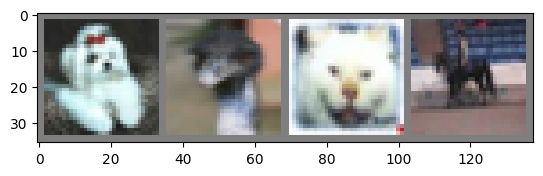

dog   bird  cat   horse


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2+0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))


In [4]:
class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Mymodel()

In [5]:
import torch.optim as optim

loss_f = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [6]:
from tqdm import tqdm
for epoch in tqdm(range(2)):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        output = model(inputs)
        loss = loss_f(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if i%2000 == 1999:
            print(f"[{epoch+1}, {i+1:5d}] loss: {running_loss/2000:.3f}")
            running_loss=0.0
print("Training done")

  0%|          | 0/2 [00:00<?, ?it/s]

[1,  2000] loss: 2.229
[1,  4000] loss: 1.897
[1,  6000] loss: 1.700
[1,  8000] loss: 1.572
[1, 10000] loss: 1.502
[1, 12000] loss: 1.440


 50%|█████     | 1/2 [00:43<00:43, 43.92s/it]

[2,  2000] loss: 1.384
[2,  4000] loss: 1.389
[2,  6000] loss: 1.324
[2,  8000] loss: 1.314
[2, 10000] loss: 1.304
[2, 12000] loss: 1.278


100%|██████████| 2/2 [01:30<00:00, 45.06s/it]

Training done


In [12]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

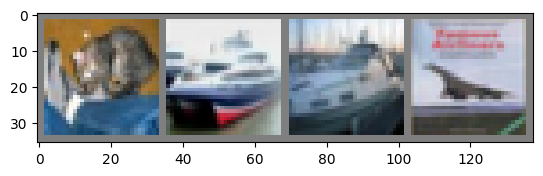

GT: cat   ship  ship  plane


In [13]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print("GT:", ' '.join(f"{classes[labels[j]]:5s}" for j in range(4)))

In [14]:
output = model(images)

In [15]:
_, predicted = torch.max(output, 1)
print("predicted: ", ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

predicted:  cat   ship  plane plane


In [16]:
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [17]:
correct=0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = model(images)
        _, predicted = torch.max(output, 1)
        total+= labels.size(0)
        correct+=(predicted==labels).sum().item()
print(f"Accuracy: {100 * correct // total} %")        


Accuracy: 54 %
